<a href="https://colab.research.google.com/github/PurvaChiniya/babysitter-violence-detection/blob/main/cnn_lstm_violence_detction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import libraries

In [ ]:
import tensorflow as tf
import numpy as np
from skimage.io import imread
from skimage.transform import resize
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os 


# Get data as videos and capture frames from each video

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
violence= np.zeros((120, 40, 160, 160, 3), dtype=np.float)
labels = []

In [ ]:
def capture(filename):
    frames = np.zeros((40, 160, 160, 3), dtype=np.float)
    i=0
    vc = cv2.VideoCapture(filename)
    if vc.isOpened():
        rval , frame = vc.read()
    else:
        rval = False
    #frm = cv2.resize(frame,(200,200))
    frm = resize(frame,(160, 160, 3))
    frm = np.expand_dims(frm,axis=0)
    if(np.max(frm)>1):
        frm = frm/255.0
    frames[i][:] = frm
    i +=1
    while i < 40:
        rval, frame = vc.read()
        #print(i)
        #plt.imshow(frame)
        #plt.show()
        #frm = cv2.resize(frame,(200,200))
        frm = resize(frame,(160, 160, 3))
        frm = np.expand_dims(frm,axis=0)
        if(np.max(frm)>1):
            frm = frm/255.0
        frames[i][:] = frm
        i +=1
        #print(frame)
    return frames

In [ ]:
main_dir="/content/drive/MyDrive/violence_detection"
os.listdir(main_dir)

['violence', 'non_violence']

In [ ]:
def cut_save(main_dir):
    i = 0
    #fights = np.zeros((60, 40, 200, 200, 3), dtype=np.float)
    #noFights = np.zeros((60, 40, 200, 200, 3), dtype=np.float)
    for dir in os.listdir(main_dir):
        td = main_dir+"/"+dir+'/'
      
        for file in os.listdir(td):
            print(file)
            fl = os.path.join(td, file)
            videos = capture(fl)
            violence[i][:][:] = videos
            i +=1
            if dir =='violence':
                labels.append(1)
            else:
                labels.append(0)
            

In [ ]:
cut_save(main_dir)
np.load("violence.py")

1.m4v
2.m4v
3.m4v
4.m4v
5.m4v
6.m4v
7.m4v
8.m4v
9.m4v
10.m4v
11.m4v
12.m4v
13.m4v
14.m4v
15.m4v
16.m4v
17.m4v
18.m4v
19.m4v
20.m4v
21.m4v
22.m4v
23.m4v
24.m4v
25.m4v
26.m4v
27.m4v
28.m4v
29.m4v
30.m4v
31.m4v
32.m4v
33.m4v
34.m4v
35.m4v
36.m4v
37.m4v
39.m4v
40.m4v
41.m4v
42.m4v
43.m4v
44.m4v
45.m4v
46.m4v
47.m4v
48.m4v
49.m4v
50.m4v
51.m4v
52.m4v
53.m4v
54.m4v
55.m4v
56.m4v
57.m4v
58.m4v
59.m4v
60.m4v
38.m4v
1.m4v
2.m4v
3.m4v
4.m4v
5.m4v
6.m4v
7.m4v
8.m4v
9.m4v
10.m4v
11.m4v
12.m4v
13.m4v
14.m4v
15.m4v
16.m4v
17.m4v
18.m4v
19.m4v
20.m4v
21.m4v
22.m4v
23.m4v
24.m4v
25.m4v
26.m4v
27.m4v
28.m4v
29.m4v
30.m4v
31.m4v
32.m4v
33.m4v
34.m4v
35.m4v
36.m4v
37.m4v
38.m4v
39.m4v
40.m4v
41.m4v
42.m4v
43.m4v
44.m4v
45.m4v
46.m4v
47.m4v
48.m4v
49.m4v
50.m4v
51.m4v
52.m4v
53.m4v
54.m4v
55.m4v
56.m4v
57.m4v
58.m4v
59.m4v
60.m4v


In [ ]:
print(len(labels))
print(violence.shape)
#np.save("violence",violence)

120
(120, 40, 160, 160, 3)


In [ ]:
#make the train and test data from all data
# 60:20:20 train:val:test

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(violence, labels, test_size=0.2, random_state=1)

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=1) # 0.25 x 0.8 = 0.2


#X_train, X_test, y_train, y_test = train_test_split(violence,labels, test_size=0.33, random_state=42)

In [ ]:
print("Train data")
print(len(y_train))
print(len(X_train))
print("Test data")
print(len(y_test))
print(len(X_test))
print("VAL Data")
print(len(y_val))
print(len(X_val))

X_train[0].shape

Train data
72
72
Test data
24
24
VAL Data
24
24


(40, 160, 160, 3)

1


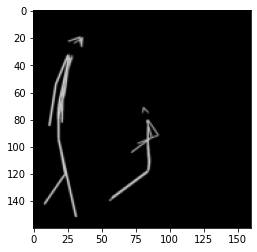

In [ ]:
plt.imshow(violence[19][26])
print(labels[19])
plt.show()

# create model

In [ ]:
layers = tf.keras.layers
models = tf.keras.models
losses = tf.keras.losses
optimizers = tf.keras.optimizers 
metrics = tf.keras.metrics
utils = tf.keras.utils
callbacks = tf.keras.callbacks
layers = tf.keras.layers
models = tf.keras.models
ImageDataGenerator = tf.keras.preprocessing.image.ImageDataGenerator
losses = tf.keras.losses
optimizers = tf.keras.optimizers 
metrics = tf.keras.metrics
utils = tf.keras.utils
callbacks = tf.keras.callbacks

plot_model = tf.keras.utils.plot_model

In [ ]:
np.random.seed(1234)
num_classes = 2

In [ ]:
vg19 = tf.keras.applications.vgg19.VGG19
base_model = vg19(include_top=False,weights='imagenet',input_shape=(160, 160,3))
# Freeze the layers except the last 4 layers
for layer in base_model.layers:
    layer.trainable = False
# Check the trainable status of the individual layers
base_model.summary()

80150528/80134624 [==============================] - 1s 0us/step
Model: "vgg19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 160, 160, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 160, 160, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 160, 160, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 80, 80, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 80, 80, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 80, 80, 128)       147584    
______________________________________________________________

In [ ]:
cnn = models.Sequential()
cnn.add(base_model)
cnn.add(layers.Flatten())
#cnn.add(layers.Dense(1024, activation='relu'))
#cnn.add(layers.Dropout(0.3))
#cnn.add(layers.Dense(512, activation='relu'))
#cnn.add(layers.Dropout(0.3))
#cnn.add(layers.LSTM(40))

# define LSTM model
model = models.Sequential()

model.add(layers.TimeDistributed(cnn,  input_shape=(40, 160, 160, 3)))
model.add(layers.LSTM(40 , return_sequences=True))

#model.add(layers.Dense(num_classes, activation="sigmoid"))
#model.add(layers.Dropout(0.3))

model.add(layers.TimeDistributed(layers.Dense(160, activation='relu')))

model.add(layers.GlobalAveragePooling1D(name="globale"))

'''
model.add(layers.Dense(1024, activation='relu'))
model.add(layers.Dropout(0.3))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dropout(0.3))
'''
model.add(layers.Dense(num_classes, activation="sigmoid" , name="last"))

adam = optimizers.Adam(learning_rate=0.0005, beta_1=0.9, beta_2=0.999, epsilon=1e-08)
#model.load_weights('cnn-lstm.hdf5')
rms = optimizers.RMSprop()
model.compile(loss='binary_crossentropy', optimizer=adam, metrics=["accuracy"])
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
time_distributed (TimeDistri (None, 40, 12800)         20024384  
_________________________________________________________________
lstm (LSTM)                  (None, 40, 40)            2054560   
_________________________________________________________________
time_distributed_1 (TimeDist (None, 40, 160)           6560      
_________________________________________________________________
globale (GlobalAveragePoolin (None, 160)               0         
_________________________________________________________________
last (Dense)                 (None, 2)                 322       
Total params: 22,085,826
Trainable params: 2,061,442
Non-trainable params: 20,024,384
_________________________________________________________________


# Train the model 

In [ ]:
class AccuracyHistory(callbacks.Callback):
    def on_train_begin(self, logs={}):
        self.acc = []
        self.val_acc = []
        self.loss = []
        self.val_loss = []

    def on_epoch_end(self, batch, logs={}):
        self.acc.append(logs.get('acc'))
        self.val_acc.append(logs.get('val_acc'))
        self.loss.append(logs.get('loss'))
        self.val_loss.append(logs.get('val_loss'))

history = AccuracyHistory()
earlyStopping = callbacks.EarlyStopping(monitor='val_loss', patience=8,min_delta=1e-5, verbose=0, mode='min')
mcp_save = callbacks.ModelCheckpoint('MCP.hdf5', save_best_only=True, monitor='val_loss', mode='min')
reduce_lr_loss = callbacks.ReduceLROnPlateau(monitor='val_loss',patience=1, verbose=2,factor=0.5,min_lr=0.0000001)

In [ ]:
y_train = utils.to_categorical(y_train)
print(y_train)
print(y_train.shape)
batch_size =3
epochs = 10

[[0. 1.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]]
(72, 2)


In [ ]:
y_val = utils.to_categorical(y_val)
print(y_val)
print(y_val.shape)

[[0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [1. 0.]]
(24, 2)


In [ ]:
import time
millis = int(round(time.time() * 1000))
print("started at " , millis)

history=model.fit(X_train,y_train ,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(X_val, y_val),callbacks=[earlyStopping, mcp_save, reduce_lr_loss,history])

started at  1631865535728
Epoch 1/10
24/24 [==============================] - 64s 762ms/step - loss: 0.6610 - accuracy: 0.6111 - val_loss: 0.5954 - val_accuracy: 0.7917
Epoch 2/10
24/24 [==============================] - 17s 716ms/step - loss: 0.5734 - accuracy: 0.8194 - val_loss: 0.4363 - val_accuracy: 0.9583
Epoch 3/10
24/24 [==============================] - 18s 761ms/step - loss: 0.4620 - accuracy: 0.8472 - val_loss: 0.3821 - val_accuracy: 0.9167
Epoch 4/10
24/24 [==============================] - 17s 724ms/step - loss: 0.3539 - accuracy: 0.9167 - val_loss: 0.2318 - val_accuracy: 0.9583
Epoch 5/10
24/24 [==============================] - 18s 764ms/step - loss: 0.3209 - accuracy: 0.8611 - val_loss: 0.1870 - val_accuracy: 1.0000
Epoch 6/10
24/24 [==============================] - 18s 766ms/step - loss: 0.2067 - accuracy: 0.9444 - val_loss: 0.3336 - val_accuracy: 0.8333

Epoch 00006: ReduceLROnPlateau reducing learning rate to 0.0002500000118743628.
Epoch 7/10
24/24 [=================

In [ ]:
history.history["val_loss"]

[0.5953927636146545,
 0.43634554743766785,
 0.3820772171020508,
 0.23181851208209991,
 0.18696726858615875,
 0.33362284302711487,
 0.1688801795244217,
 0.09292856603860855,
 0.07969008386135101,
 0.07079997658729553]

In [ ]:
history.history

{'accuracy': [0.6111111044883728,
  0.8194444179534912,
  0.8472222089767456,
  0.9166666865348816,
  0.8611111044883728,
  0.9444444179534912,
  0.9722222089767456,
  1.0,
  1.0,
  1.0],
 'loss': [0.6610163450241089,
  0.5733667612075806,
  0.4620482623577118,
  0.3539339601993561,
  0.3208756446838379,
  0.20669230818748474,
  0.16569967567920685,
  0.08882104605436325,
  0.07067903876304626,
  0.05092085897922516],
 'lr': [0.0005,
  0.0005,
  0.0005,
  0.0005,
  0.0005,
  0.0005,
  0.00025,
  0.00025,
  0.00025,
  0.00025],
 'val_accuracy': [0.7916666865348816,
  0.9583333134651184,
  0.9166666865348816,
  0.9583333134651184,
  1.0,
  0.8333333134651184,
  0.9166666865348816,
  1.0,
  1.0,
  1.0],
 'val_loss': [0.5953927636146545,
  0.43634554743766785,
  0.3820772171020508,
  0.23181851208209991,
  0.18696726858615875,
  0.33362284302711487,
  0.1688801795244217,
  0.09292856603860855,
  0.07969008386135101,
  0.07079997658729553]}

range(0, 10)


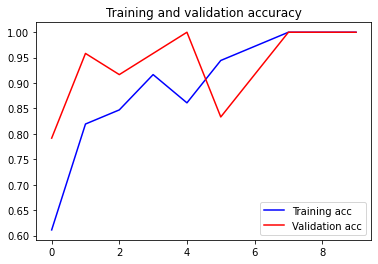

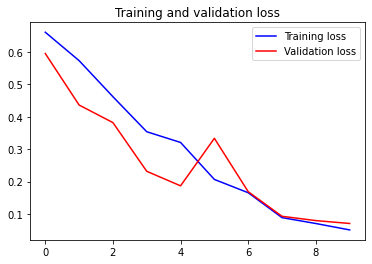

In [ ]:
acc = history.history["accuracy"]
val_acc = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(len(acc))
print(epochs)
plt.plot(epochs, acc, 'b', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
 
plt.figure()

plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
 
plt.show()

In [ ]:
score = model.evaluate(X_val, y_val, batch_size=3)
score

8/8 [==============================] - 4s 531ms/step - loss: 0.0708 - accuracy: 1.0000


[0.07079997658729553, 1.0]

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def print_confusion_matrix(confusion_matrix, class_names, figsize = (10,7), fontsize=14):
    df_cm = pd.DataFrame(
        confusion_matrix, index=class_names, columns=class_names, 
    )
    fig = plt.figure(figsize=figsize)
    try:
        heatmap = sns.heatmap(df_cm, annot=True, fmt="d")
    except ValueError:
        raise ValueError("Confusion matrix values must be integers.")
    heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=fontsize)
    heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=45, ha='right', fontsize=fontsize)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    return fig

In [ ]:
Y_pred = model.predict(X_test , batch_size=1)

In [ ]:
Y_pred

array([[0.57622355, 0.40836453],
       [0.07665963, 0.9328263 ],
       [0.04395054, 0.960729  ],
       [0.96609604, 0.02844177],
       [0.96399   , 0.0306537 ],
       [0.06364585, 0.9406806 ],
       [0.1740128 , 0.83270943],
       [0.93622994, 0.05322236],
       [0.11518659, 0.8933258 ],
       [0.7950383 , 0.17813256],
       [0.23457877, 0.7785229 ],
       [0.96969986, 0.02496961],
       [0.03983   , 0.9643525 ],
       [0.8885229 , 0.09267221],
       [0.9716034 , 0.02375923],
       [0.0634527 , 0.9408201 ],
       [0.9683459 , 0.02626888],
       [0.96836007, 0.02643337],
       [0.9739465 , 0.02153525],
       [0.42778543, 0.5391013 ],
       [0.97182953, 0.02352316],
       [0.03369255, 0.96876717],
       [0.96288246, 0.03042957],
       [0.9718573 , 0.02345391]], dtype=float32)

In [ ]:
yprd = Y_pred > 0.5
ypredicted = []
for zero,one in yprd:
    if zero == True:
        ypredicted.append(0)
    else:
        ypredicted.append(1)


In [ ]:
y_test = utils.to_categorical(y_test)
print(y_test)

[[1. 0.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]]


In [ ]:
y = []

for zero,one in y_test:
    if zero == True:
        y.append(0)
    else:
        y.append(1)
ypredicted


[0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0]

In [ ]:
y_test

array([[1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.]], dtype=float32)

In [ ]:
confusion = confusion_matrix(y,ypredicted)
confusion.shape


(2, 2)

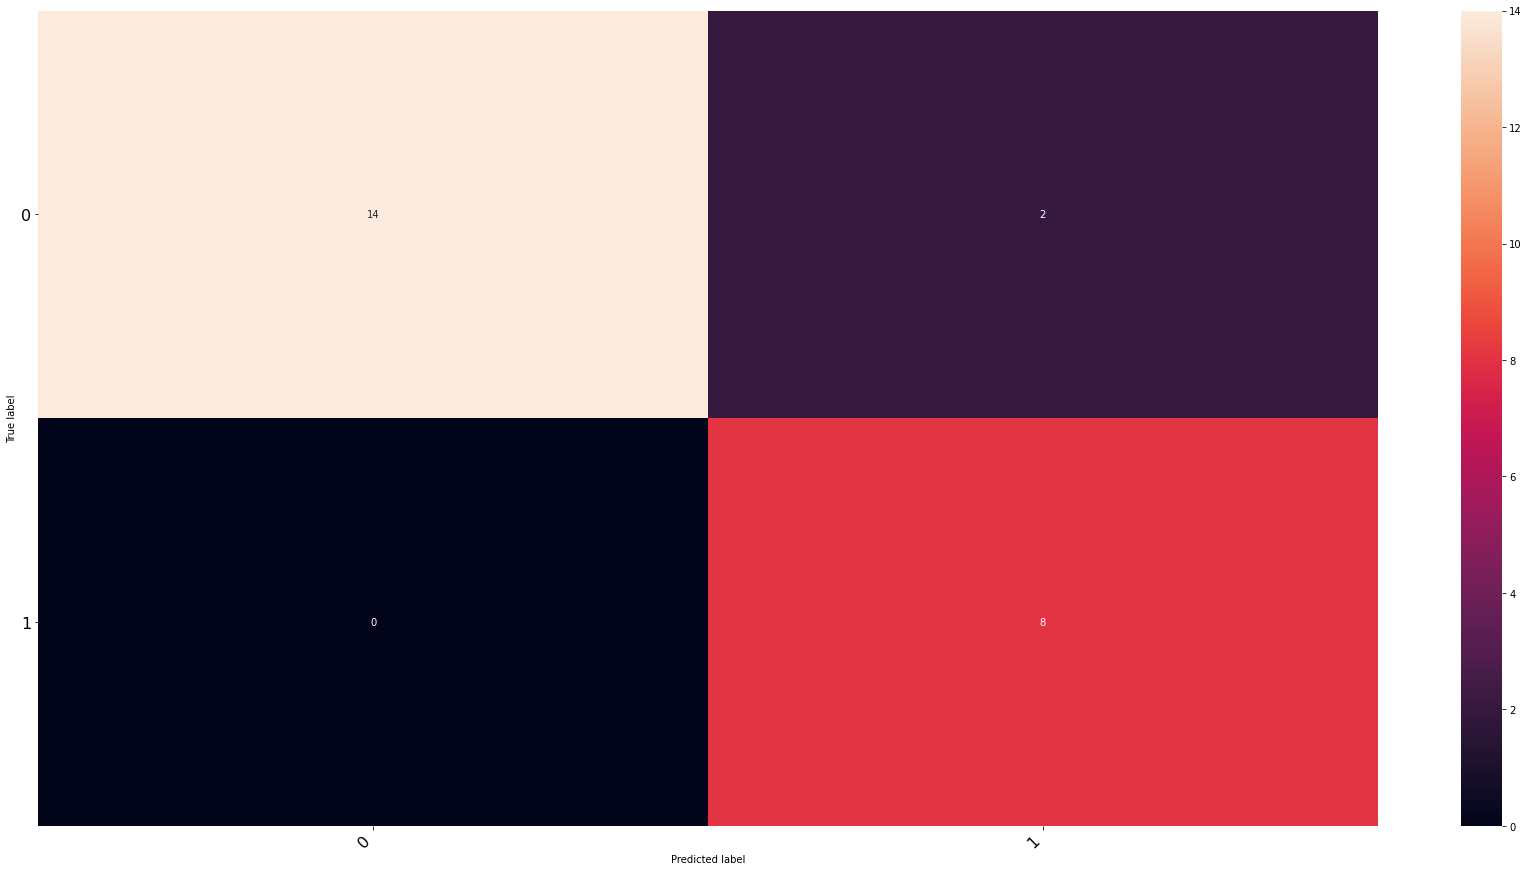

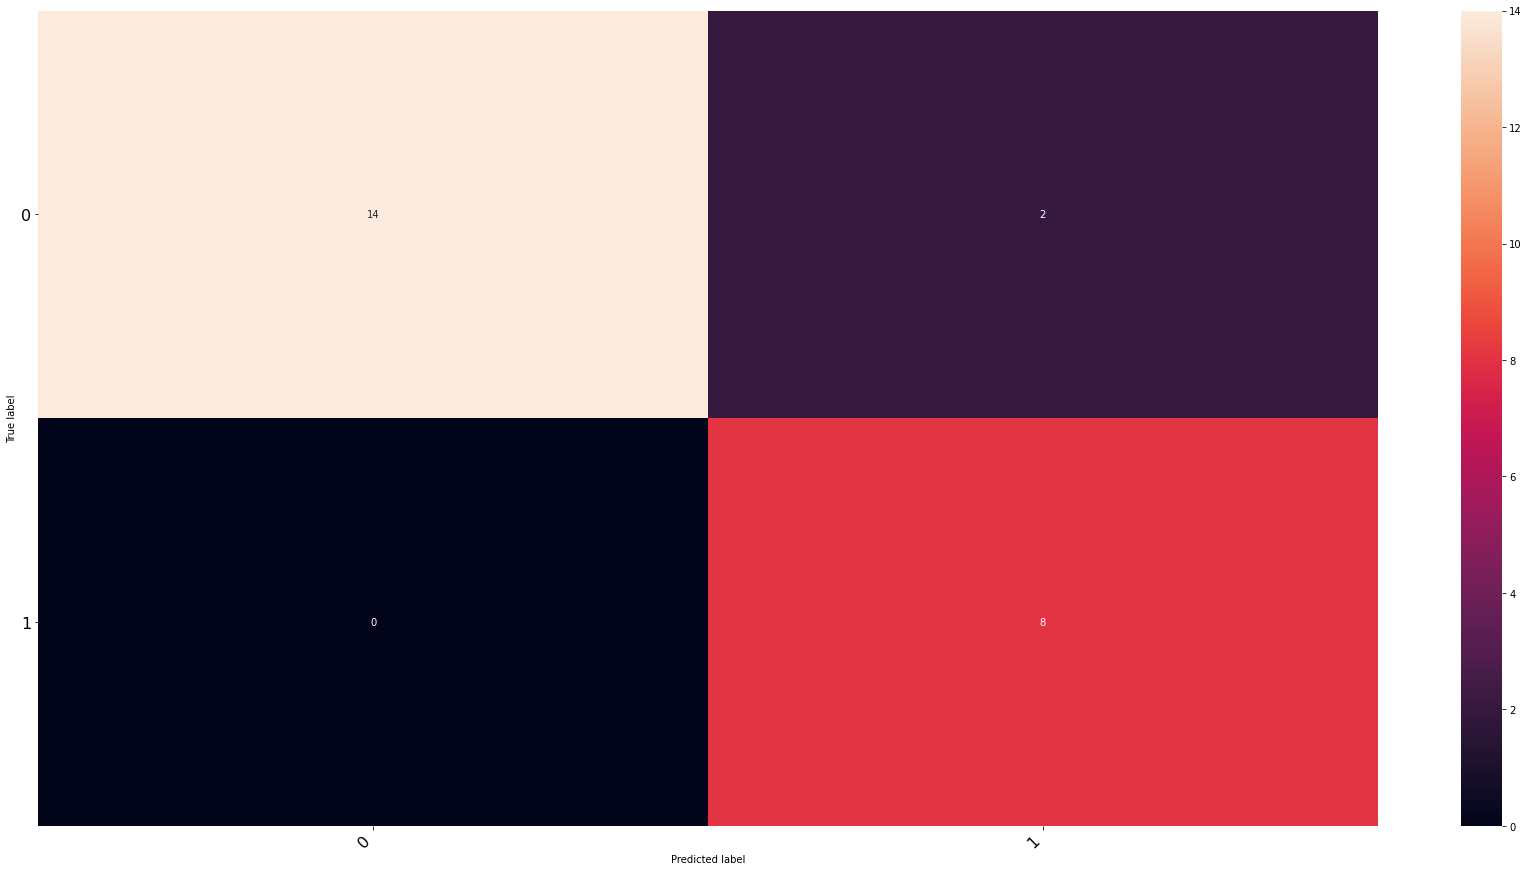

In [ ]:
print_confusion_matrix(confusion, [0,1], figsize = (30,15), fontsize=16)

In [78]:
print('Classification Report')
print(classification_report(y, ypredicted, target_names=['no-violence','violence']))

Classification Report
              precision    recall  f1-score   support

 no-violence       1.00      0.88      0.93        16
    violence       0.80      1.00      0.89         8

    accuracy                           0.92        24
   macro avg       0.90      0.94      0.91        24
weighted avg       0.93      0.92      0.92        24



In [ ]:
model.save("/content/drive/MyDrive/violence_detection/checkpoints/cnn-lstm.hdfs")

INFO:tensorflow:Assets written to: /content/drive/MyDrive/violence_detection/checkpoints/cnn-lstm.hdfs/assets


INFO:tensorflow:Assets written to: /content/drive/MyDrive/violence_detection/checkpoints/cnn-lstm.hdfs/assets


# Testing a sample


In [ ]:
def video_reader(cv2,filename):
    frames = np.zeros((40, 160, 160, 3), dtype=np.float)
    i=0
    print(frames.shape)
    vc = cv2.VideoCapture(filename)
    if vc.isOpened():
        rval , frame = vc.read()
    else:
        rval = False
    frm = resize(frame,(160,160,3))
    frm = np.expand_dims(frm,axis=0)
    if(np.max(frm)>1):
        frm = frm/255.0
    frames[i][:] = frm
    i +=1
    print("reading video")
    while i < 30:
        rval, frame = vc.read()
        frm = resize(frame,(160,160,3))
        frm = np.expand_dims(frm,axis=0)
        if(np.max(frm)>1):
            frm = frm/255.0
        frames[i][:] = frm
        i +=1
    return frames

In [ ]:
def pred_fight(model,video,acuracy=0.9):
    pred_test = model.predict(video)
    if pred_test[0][1] >=acuracy:
        return True , pred_test[0][1]
    else:
        return False , pred_test[0][1]

In [ ]:
def main_fight(vidoss):
    vid = video_reader(cv2,vidoss)
    datav = np.zeros((1, 40, 160, 160, 3), dtype=np.float)
    datav[0][:][:] = vid
    millis = int(round(time.time() * 1000))
    print(millis)
    f , precent = pred_fight(model,datav,acuracy=0.65)
    millis2 = int(round(time.time() * 1000))
    print(millis2)
    res_mamon = {'fight':f , 'precentegeoffight':str(precent)}
    res_mamon['processing_time'] =  str(millis2-millis)
    return res_mamon

In [ ]:
res = main_fight('/content/drive/MyDrive/violence_detection/violence/1.m4v')

(40, 160, 160, 3)
reading video
1631867954576
1631867954934


In [ ]:
res

{'fight': True, 'precentegeoffight': '0.9626249', 'processing_time': '358'}